# Dynamic Controller Placement Problem using Clustering and Traffic Analysis

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pickle

## Importing PalmettoNet Topology
<img src="palmetto.jpg">


In [12]:
G = nx.read_graphml("Palmetto.graphml")

In [16]:
G.nodes()['0']

{'Internal': 1,
 'Latitude': 34.92487,
 'Country': 'United States',
 'id': 0,
 'Longitude': -81.02508,
 'label': 'Rock Hill'}

## Extracting coordinates of each node

In [17]:
lat = nx.get_node_attributes(G,'Latitude')

In [18]:
lon = nx.get_node_attributes(G,'Longitude')

In [19]:
coor = {}
for key,value in lat.items():
    coor[key] = [lon[key],value]

## Ploting PalmettoNet topology

C:\Users\u_kan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


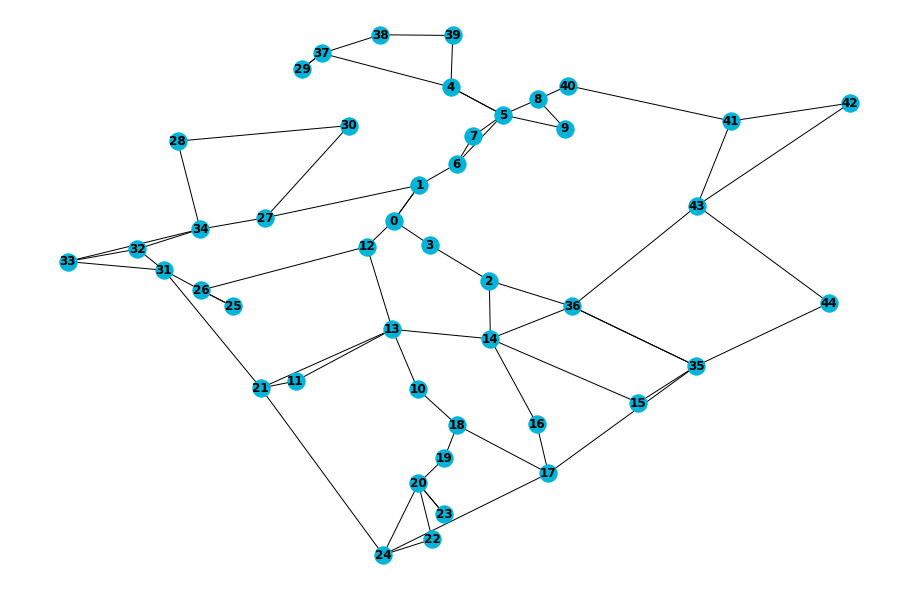

In [20]:
plt.figure(figsize=(12,8))
nx.draw(G, with_labels=True, font_weight='bold',node_color='#00b4d9',pos=coor)

## Ploting the nodes and converting coordinate deg to KM

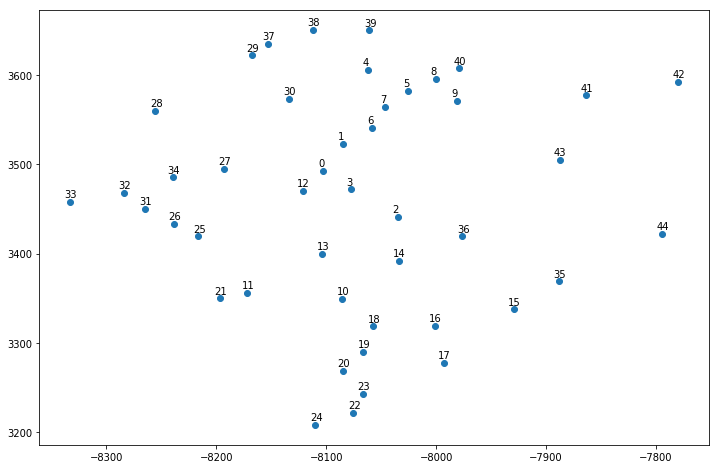

In [21]:
fig = plt.figure(figsize=(12,8))
y = (np.array(list(coor.values()))*100)[:,1]
x = (np.array(list(coor.values()))*(100))[:,0]
n = range(len(coor))
ax = fig.subplots()
ax.scatter(x, y)
[ax.annotate(int(z[0]), (z[1]-5, z[2]+5)) for z in np.array([n,x,y]).T]
plt.show()

## Applying K means clustering 

In [22]:
X = np.array(list(zip(x,y)))
Kmean = KMeans(n_clusters=4) # No. of initial cluster is taken 4
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
Kmean.cluster_centers_

array([[-8044.26485714,  3320.6105    ],
       [-8069.61973333,  3578.9842    ],
       [-8228.62354545,  3449.66609091],
       [-7842.9004    ,  3493.283     ]])

## Ploting the clusters 

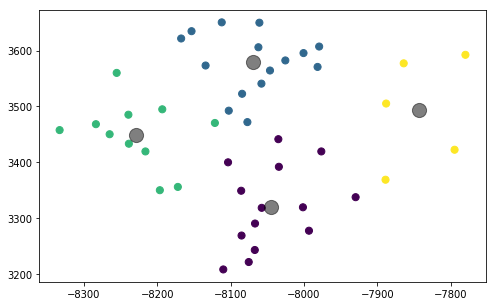

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1], c=Kmean.labels_, s=50, cmap='viridis')
centers = Kmean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


## Connection between switch and controller

In [25]:
Kmean.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 0, 1, 1, 1, 1, 3, 3, 3,
       3])

## Preparing part of Input for Mininet simulation

In [30]:
cont_list = list(map(lambda c: 'c' + str(c),Kmean.labels_))

In [31]:
'''
with open("controller-palmetto.txt", "wb") as fp:
    pickle.dump(cont_list, fp)
'''   

In [ ]:
''' 
with open("controller-palmetto.txt", "rb") as fp:
    c_list = pickle.load(fp)
'''

In [40]:
sw_list = list(map(lambda c: 's' + str(c),list(range(len(cont_list)))))


In [39]:
for n in list(map(lambda x, y: "net.get(\'" + y + "\').start([" + x + "])", cont_list, sw_list)):
    print(n)

net.get('s0').start([c1])
net.get('s1').start([c1])
net.get('s2').start([c0])
net.get('s3').start([c1])
net.get('s4').start([c1])
net.get('s5').start([c1])
net.get('s6').start([c1])
net.get('s7').start([c1])
net.get('s8').start([c1])
net.get('s9').start([c1])
net.get('s10').start([c0])
net.get('s11').start([c2])
net.get('s12').start([c2])
net.get('s13').start([c0])
net.get('s14').start([c0])
net.get('s15').start([c0])
net.get('s16').start([c0])
net.get('s17').start([c0])
net.get('s18').start([c0])
net.get('s19').start([c0])
net.get('s20').start([c0])
net.get('s21').start([c2])
net.get('s22').start([c0])
net.get('s23').start([c0])
net.get('s24').start([c0])
net.get('s25').start([c2])
net.get('s26').start([c2])
net.get('s27').start([c2])
net.get('s28').start([c2])
net.get('s29').start([c1])
net.get('s30').start([c1])
net.get('s31').start([c2])
net.get('s32').start([c2])
net.get('s33').start([c2])
net.get('s34').start([c2])
net.get('s35').start([c3])
net.get('s36').start([c0])
net.get('s3